# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
!pip install pandas
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [3]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv') # change the path
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [5]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [6]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [8]:
regressor = Sequential()

The purpose of the following lines is to introduce you to LSTM.

### Adding the first LSTM layer (units=50) and some Dropout (0.2) regularisation

In [9]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

C:\src\my\uwf-idc6146-deep-learning\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer (units=50) and some Dropout (0.2) regularisation

In [10]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer (units=50) and some Dropout (0.2) regularisation

In [11]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer (units=50) and some Dropout (0.2) regularisation

In [12]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding the output layer

In [13]:
regressor.add(Dense(1))

### Compiling the RNN with appropriate optimizer and loss function

In [14]:
regressor.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

### Fitting the RNN to the Training set

In [15]:
regressor.fit(X_train, y_train, epochs=10)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1454 - mae: 0.3082
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0899 - mae: 0.2459
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0818 - mae: 0.2324
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0794 - mae: 0.2297
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0795 - mae: 0.2319
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0808 - mae: 0.2342
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0810 - mae: 0.2338
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0754 - mae: 0.2227
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0785 - mae: 0.2299
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0793 - mae: 0.2313


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv') 
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [17]:
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 80):
    X_test.append(inputs[i - 60:i, 0])

# reshape the test data and make prediction for the stock price

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = np.reshape(predicted_stock_price, (predicted_stock_price.shape[0], predicted_stock_price.shape[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


### Visualising the results

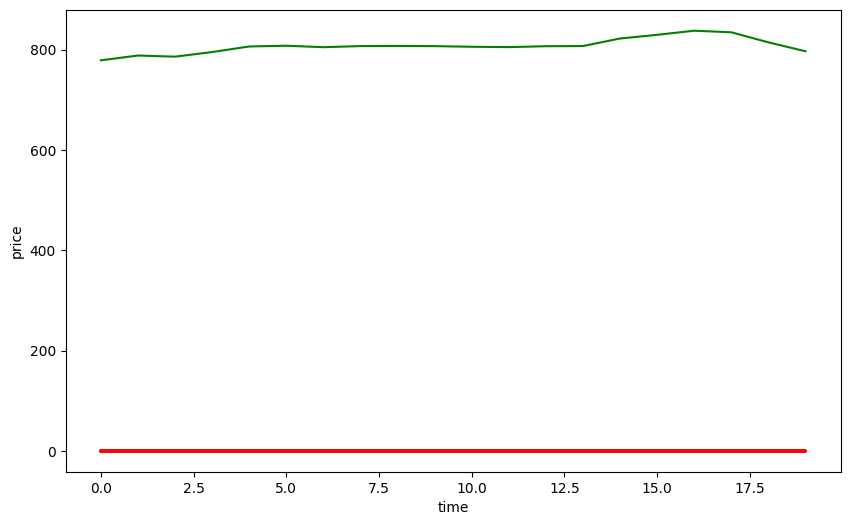

In [18]:
# plot Real Google Stock Price over time and Predicted Google Stock Price over time in the same plot/figure

plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='green', label='real price')
plt.plot(predicted_stock_price, color='red', label='predicted prie')
plt.xlabel('time')
plt.ylabel('price')
plt.show()